In [21]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt



In [34]:
from scipy.ndimage import interpolation as inter

In [38]:
pic=glob('/content/1.png')

In [39]:
img=cv2.imread(pic[0])

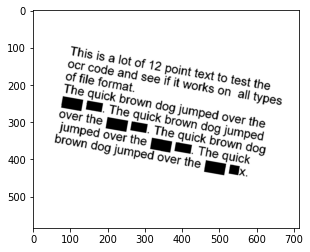

In [40]:
plt.imshow(img)

In [41]:
def img_skew(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

In [48]:
def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
          borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

5


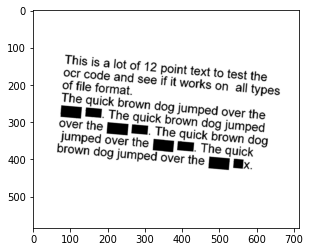

In [49]:
angle, rotated = correct_skew(img)
print(angle)
plt.imshow( rotated)

5


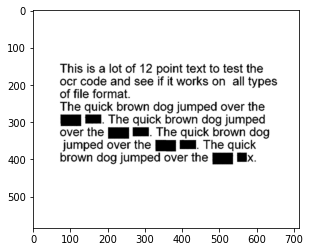

In [51]:
angle1, rotated1 = correct_skew(rotated)
print(angle1)
plt.imshow( rotated1)

0


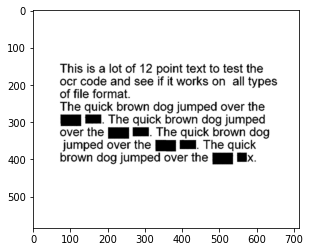

In [52]:
angle2, rotated2 = correct_skew(rotated1)
print(angle2)
plt.imshow( rotated2)